# 分类问题
## logistic回归
在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

path = 'ex2data1.txt'

# 应该先看数据的结构，再对其进行命名
# data = pd.read_csv(path)
# data.shape
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 可视化数据

在此解释一下表达式：positive = data[data['Admitted'].isin([1])]的含义。

In [3]:
# 判断 data 数据框中 Admitted 列的每个值是否等于 1, 并生成一个全为布尔值的特征向量
a = data['Admitted'].isin([1])
print(a)
# 通过数值索引，得到布尔值为True的特征向量
b = data[a]
b

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Admitted, Length: 100, dtype: bool


,Exam 1,Exam 2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


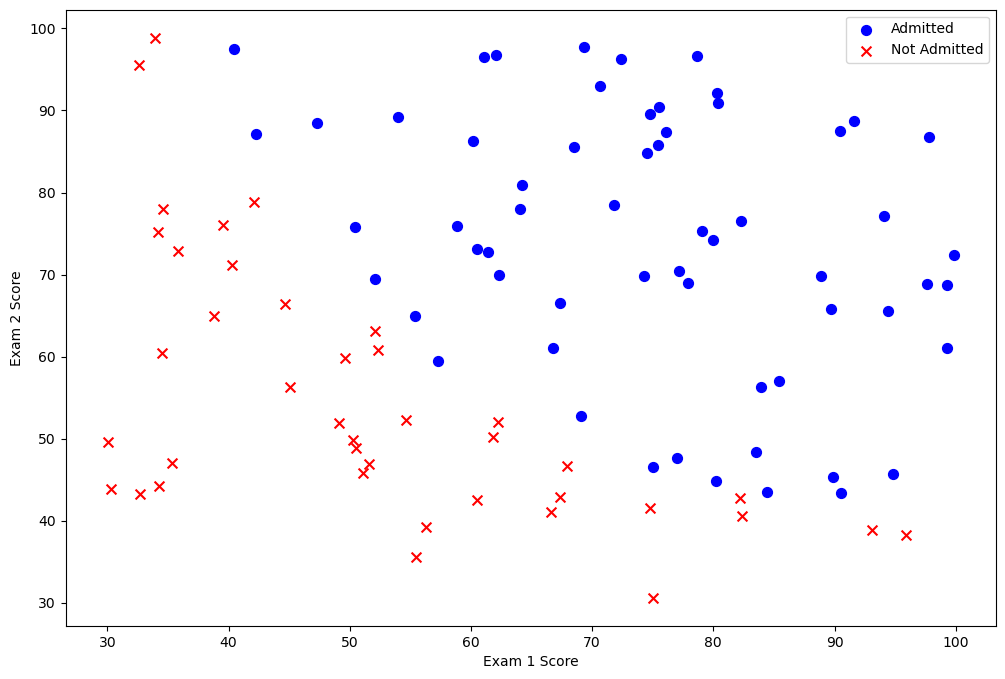

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# logistic函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$
合起来，我们得到逻辑回归模型的假设函数： ${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$

In [5]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

检查函数是否工作

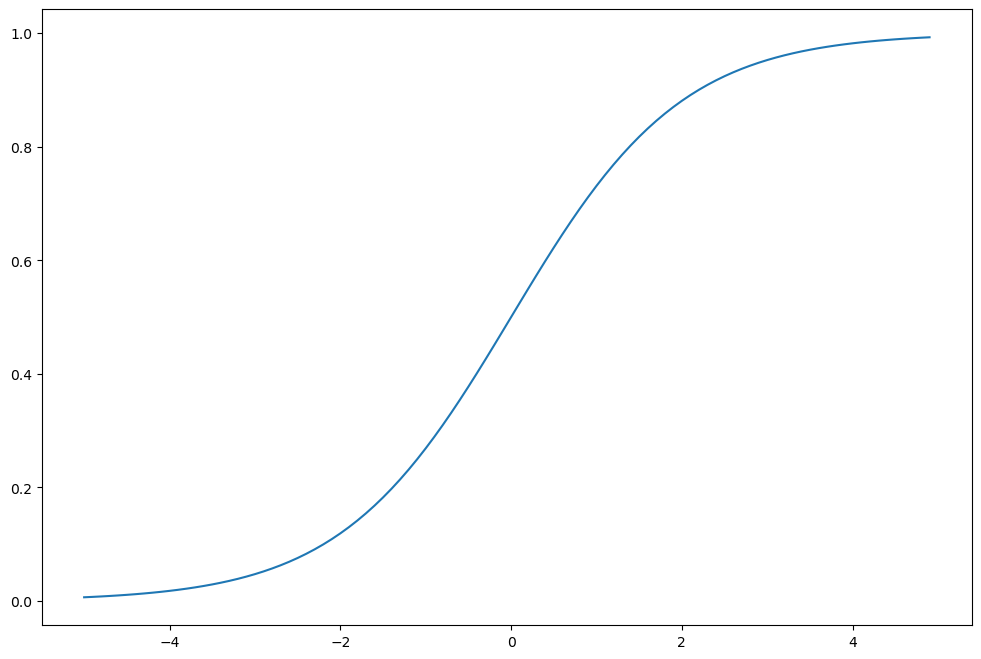

In [6]:
x = np.arange(-5, 5, 0.1)

plt.figure(figsize=(12,8))
plt.plot(x, logistic(x))
plt.show()

# 代价函数（损失函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

# 特别注意！！！  

我在写代码时遇上的小坑：

1. **查看数组的形状是为了进行正确的矩阵运算**。
2. **`matrix` 方法目前已经过时**，大多使用 `array` 方法。因为 `matrix` 是严格的二维数组，在参考代码中 `theta = np.zeros(3)` 是一维数组，但在计算时会转化成二维数组运算。如果只将 `matrix` 改为 `array`，运算结果会不对。所以在处理 `theta` 时，应该变成二维数组 `theta = np.zeros((3, 1))`。
3. **代码中书写的 `X * theta.T` 采用的是广播机制**。如果使用 `array` 方法，则需使用矩阵乘法 `@` 或 `dot` 方法。
4. **我们习惯将 `theta` 向量写成列向量**，并且该向量行数等于 `X` 的列数，所以在 `cost` 函数中写成 `X @ theta`，而不进行转置。

In [7]:
def cost(theta, X, y):
    # 将数据转换为 NumPy 数组
    theta = np.array(theta)
    X = np.array(X)
    y = np.array(y)
    
    # y = 1 时
    y_1 = np.multiply(-y, np.log(logistic(X @ theta)))
    # y = 0 时
    y_0 = np.multiply((1 - y), np.log(1 - logistic(X @ theta)))
    return np.sum(y_1 - y_0) / (len(X))

检测函数是否工作

In [8]:
# 方便计算h_theta(x)
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# 转换为 NumPy 数组
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros((3, 1))

In [9]:
theta, X.shape, theta.shape, y.shape

(array([[0.],
        [0.],
        [0.]]),
 (100, 3),
 (3, 1),
 (100, 1))

In [10]:
cost(theta, X, y)

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

# 重点注意！！！

参考代码依旧使用 `matrix` 方法，如果使用 `array` 方法必须注意以下几点：

1. **维度问题**：
   - `matrix` 强制为二维数组，因此在使用 `ravel` 方法一维展开时，结果的形状是 `(1, n)`。在这种情况下，获取 `theta` 的形状时，应该使用 `theta.ravel().shape[1]`。

2. **求 `theta` 的数量**：
   - 直接法：通过将 `theta` 展成 `(1, n)` 或 `(n, 1)` 的形式，利用方法求出结果。
   - 间接法：`theta` 的数量等于特征量加 1，即 `X` 的列数。

3. **数组维度处理**：
   - 在 `matrix` 方法中，`term = np.multiply(error, X[:,i])` 的表达式是有效的，因为 `matrix` 是二维数组。
   - 使用 `array` 方法时，默认情况下没有规定形状，数组会被视为一维。为了解决这个问题，可以将表达式改为 `term = np.multiply(error, X[:,i].reshape(-1, 1))`。

4. **切片后的形状**：
   - 如果一开始已经规定了 `theta` 的形状，在循环切片时得到的切片依然是一维的。此时仍需使用 `reshape` 改变形状。


In [11]:
def gradient(theta, X, y):
    theta = np.array(theta)
    X = np.array(X)
    y = np.array(y)
    
    parameters = int(theta.reshape(1, -1).shape[1])
    grad = np.zeros(parameters)
    
    error = logistic(X @ theta) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i].reshape(-1,1))
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [12]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。因为上方的梯度下降函数和代价函数根据参考代码相对实现的比较复杂并且目前存在一些错误，本人尽快会解决（2024.8.11），所以目前使用下方重写的函数。

In [13]:
def newcost(theta, X, y):
    theta = np.array(theta)
    X = np.array(X)
    y = np.array(y)

    h = logistic(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))


def newgradient(theta, X, y):
    theta = np.array(theta)
    X = np.array(X)
    y = np.array(y)

    error = logistic(X @ theta) - y
    return (X.T @ error) / len(X)

计算结果的含义  
1、[-25.16131865,   0.20623159,   0.20147149]表示theta  
2、36表示迭代次数，也叫函数评估次数  
3、0是状态代码，表示优化成功，其他的值也对应其他的状态，比如遇到奇异矩阵

In [14]:
import scipy.optimize as opt

# y得展平才能使用该方法
Y = y.flatten()
result = opt.fmin_tnc(func=newcost, x0=theta, fprime=newgradient, args=(X, Y))
result

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

在这个结论下代价函数计算结果

In [15]:
newcost(result[0], X, Y)

0.2034977015894745

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$
当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。

In [16]:
def predict(theta, X):
    probability = logistic(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
theta_min = np.array(result[0]).reshape((3, 1))
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
